#### Task-03

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

##### Import libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

##### Load Dataset

In [2]:
df = pd.read_csv(r'bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


##### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


##### Handling Missing Values

In [6]:
#count unknown values in each column
for col in df.columns:
    print(f'{col} : {(df[col] == 'unknown').sum()}')

age : 0
job : 288
marital : 0
education : 1857
default : 0
balance : 0
housing : 0
loan : 0
contact : 13020
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 36959
y : 0


In [7]:
# Replace unknown with mode value
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].replace('unknown', df[col].mode()[0])

In [8]:
# check unknown values in each column
for col in df.columns:
    print(f'{col} : {(df[col] == 'unknown').sum()}')

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 36959
y : 0


In [9]:
# drop rows with unknown values
df = df[~df.isin(['unknown']).any(axis=1)]

In [10]:
# check values in each column
for col in df.columns:
    print(f'{col} : {(df[col] == 'unknown').sum()}')

age : 0
job : 0
marital : 0
education : 0
default : 0
balance : 0
housing : 0
loan : 0
contact : 0
day : 0
month : 0
duration : 0
campaign : 0
pdays : 0
previous : 0
poutcome : 0
y : 0


In [11]:
# check for duplicates
df = df.drop_duplicates()

##### Preprocess the data

In [12]:
# handling categorical var = convert categorical var into numerical using one - hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,y_yes
24060,33,882,21,39,1,151,3,False,False,False,...,False,False,False,False,False,True,False,False,False,False
24062,42,-247,21,519,1,166,1,False,False,False,...,False,False,False,False,False,True,False,True,False,True
24064,33,3444,21,144,1,91,4,False,False,False,...,False,False,False,False,False,True,False,False,False,True
24072,36,2415,22,73,1,86,4,False,False,False,...,False,False,False,False,False,True,False,True,False,False
24077,36,0,23,140,1,143,3,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [13]:
# Feature Selection = select relevant features for the model
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']

##### Split the Data into Training and Test sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Build Decision Tree Classifier

In [15]:
# Initialie the classifier
clf = DecisionTreeClassifier(random_state=42)

In [16]:
# Train the model
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##### Evaluate the Model

In [17]:
# Make predictions
y_pred = clf.predict(X_test)

In [18]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8013325257419746


In [19]:
print("classification_report : \n", classification_report(y_test, y_pred))

classification_report : 
               precision    recall  f1-score   support

       False       0.89      0.86      0.87      1310
        True       0.52      0.57      0.54       341

    accuracy                           0.80      1651
   macro avg       0.70      0.72      0.71      1651
weighted avg       0.81      0.80      0.80      1651



In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1128  182]
 [ 146  195]]


##### Decision Tree Visualization

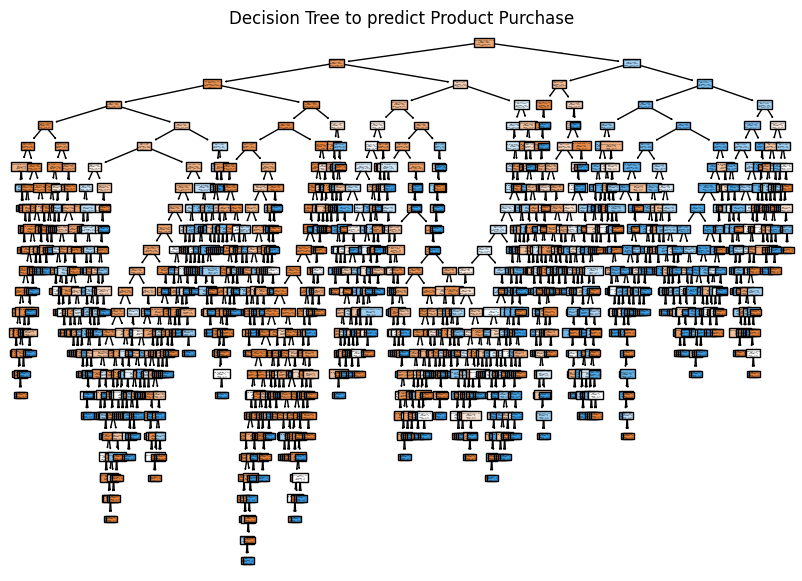

In [23]:
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True,class_names=['no', 'yes'],feature_names=X.columns)
plt.title("Decision Tree to predict Product Purchase")
plt.show()

##### Test Purchase Prediction

In [ ]:
sample = {
    'age': 45,
    'job': 'technician',
    'marital': 'married',
    'education': 'secondary',
    'default': 'no',
    'balance': 1350,
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'day': 15,
    'month': 'may',
    'duration': 210,
    'campaign': 2,
    'pdays': 999,
    'previous': 0,
    'poutcome': 'nonexistent',
}

new_data = pd.DataFrame(sample, index=[0])
new_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,45,technician,married,secondary,no,1350,yes,no,cellular,15,may,210,2,999,0,nonexistent


In [33]:
combined = pd.concat([df.drop('y',axis=1),new_data],axis=0)
combined.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure


In [37]:
# One-hot encode the new_data only
new_data_encoded = pd.get_dummies(new_data, drop_first=True)
new_data_encoded

,age,balance,day,duration,campaign,pdays,previous
0,45,1350,15,210,2,999,0


In [38]:
# Ensure all columns in training data X are in new_data_encoded
for col in X.columns:
    if col not in new_data_encoded.columns:
        new_data_encoded[col] = 0

In [39]:
# Drop any columns in new_data_encoded that were not in X.columns
new_data_encoded = new_data_encoded[X.columns]
new_data_encoded

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,45,1350,15,210,2,999,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Now predict
prediction = clf.predict(new_data_encoded)

In [41]:
print("Likely to purchase" if prediction[0] == 1 else "Not likely to purchase")

Likely to purchase
